### We have to explore the relationship between "temperature" and "ice cream" sales and apply polynomial regression techniques to predict the number of ice cream units sold based on temperature. 

####  Does not follow linearity and make a random graph , we apply  'Polynomial regression'. In Polynomial 'powers' are added in our 'data'bcuz of powers added 'prediction line' change into 'polynomial line'

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('Polynomial_Regression.csv')
df.head(3)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


In [42]:
# To check corelation 
df.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


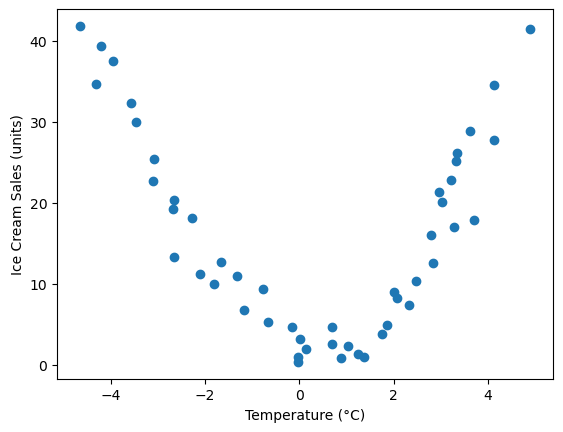

In [43]:
plt.scatter(df['Temperature (°C)'],df['Ice Cream Sales (units)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [44]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [45]:
x = df[['Temperature (°C)']]            # must be in multi dimensional thats why use double square bracket
y = df['Ice Cream Sales (units)']       # 'Ice Cream Sales (units)' is prediction model

#### Now will convert into "Polynomial Feature" then will make 'Prediction Model'

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
pf.transform(x)
x = pf.transform(x)   # will put in Orginal dataset 

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(84.30551371938841, 94.13665676490518)

In [53]:
lr.coef_

array([ 0.        , -0.70641926,  1.87145125])

In [54]:
lr.intercept_

2.7683058295738654

In [55]:
y_prd = lr.predict(x)     # for 'prediction'we have to give data, the graph shown below is made with the overall data
                        # so will predict with all data

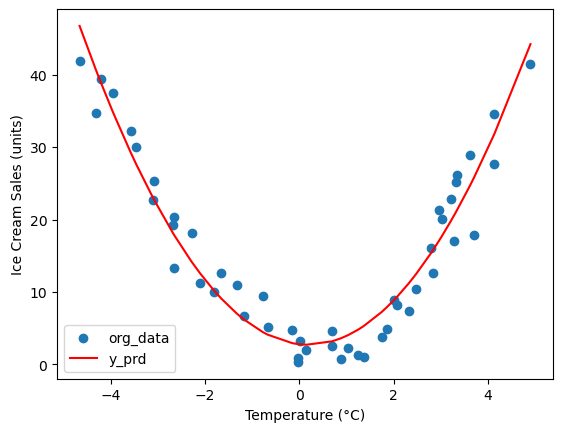

In [56]:
plt.scatter(df['Temperature (°C)'],df['Ice Cream Sales (units)'])
plt.plot(df['Temperature (°C)'],y_prd,c = 'red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend(['org_data','y_prd'])
plt.show()

In [59]:
test = pf.transform([[3.270044068]])  # new data to test , first will convert into polynomial feature
test

C:\Users\anamn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.        ,  3.27004407, 10.69318821]])

In [60]:
# Now whenever have to do prediction,means when want to deploy this dataset
lr.predict(test)

array([20.47006415])